<a href="https://colab.research.google.com/github/easyri/splines/blob/main/linear_splines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from PIL import Image
import IPython as ip



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g7p7EPfZWx6XCOPor-djz_SI6Uhc47KAHnxn9OK4rKv_O5PFHi7-Sw


Mounted at /content/drive


Оригинал:

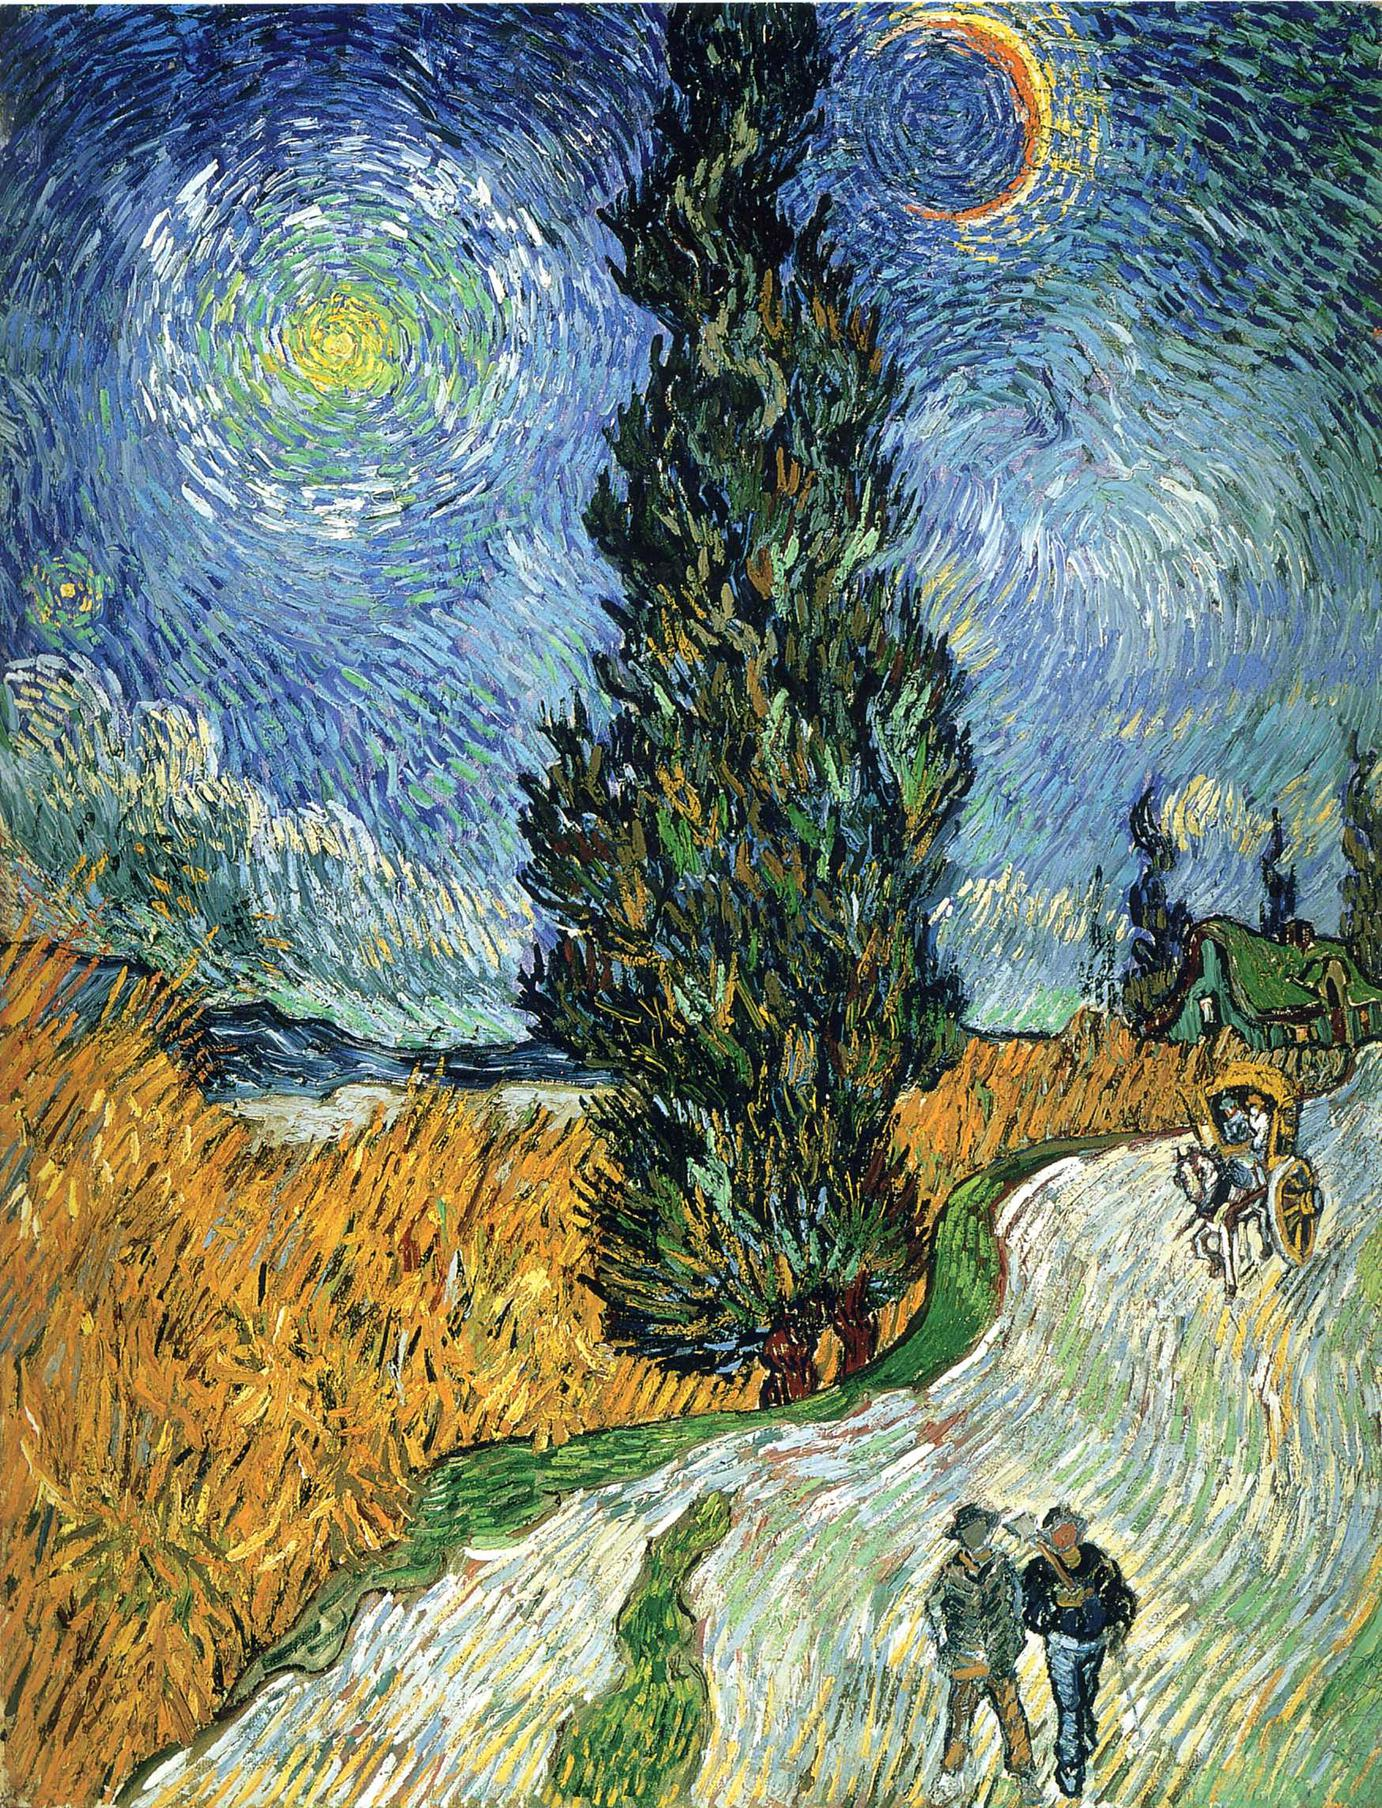

In [3]:
ip.display.display(ip.display.Image('/content/drive/MyDrive/splines/vincent-van-gogh_road-with-cypresses-1890.jpg'))

In [4]:
img = Image.open('/content/drive/MyDrive/splines/vincent-van-gogh_road-with-cypresses-1890.jpg')
width, height = img.size
print(width, height)

1382 1808


In [ ]:
img = Image.open('/content/MicrosoftTeams-image.png')
width, height = img.size
print(width, height)

512 512


In [ ]:
print(img.getbands())

('R', 'G', 'B')


In [5]:
img_arr = np.asarray(img)

In [6]:
# вырезаем нечетные строки и столбцы
def cut2x(img_arr):
  height, width, channels = img_arr.shape
  mini_arr = np.zeros((height // 2, width // 2, channels), dtype=np.uint8)
  i = 0
  j = 0
  while i < height:
    k = 0
    s = 0
    while k < width:
      mini_arr[j][s] = img_arr[i][k]
      k += 2
      s += 1
    i += 2
    j += 1
  return mini_arr

In [7]:
mini_arr = cut2x(img_arr)
Image.fromarray(mini_arr).save('/content/drive/MyDrive/splines/cut_road-with-cypresses-1890.jpg')

Сократили:

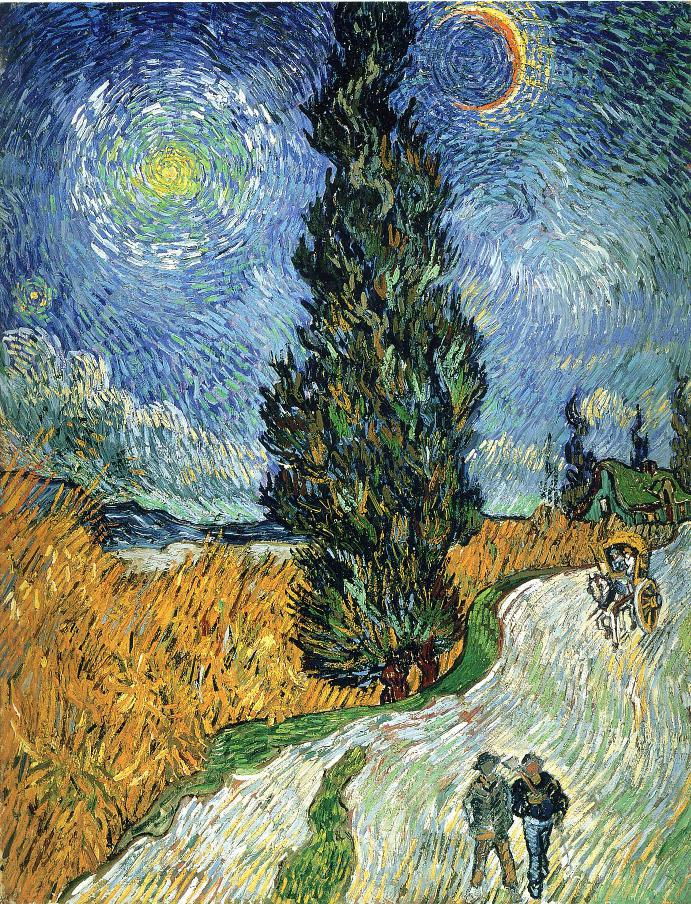

In [8]:
ip.display.display(ip.display.Image('/content/drive/MyDrive/splines/cut_road-with-cypresses-1890.jpg'))

In [12]:
# сплайны

def spline_j(x, xj, xj1):
  if xj <= x <= xj1:
    return (x - xj1) / (xj - xj1)
  print("segment error")

def spline_j1(x, xj, xj1):
  if xj <= x <= xj1:
    return (x - xj) / (xj1 - xj)
  print("segment error")

def u(x, xj, xj1, uj, uj1):
  return (uj1 - uj) * spline_j1(x, xj, xj1) + uj
  

In [15]:
# увеличиваем в исходный размер

def enlarge2x(img):
  height, width, channels = img.shape
  new_arr = np.zeros((height * 2, width * 2, channels), dtype=np.uint8)
  i = 0   # восстанавливаем пиксели с четными номерами строк и столбцов(копируем из маленького изображения)
  j = 0
  while(i < height):
    k = 0
    s = 0
    while(k < width):
      new_arr[j][s] = img[i][k]
      # print(new_arr[j][s][0])
      k += 1
      s += 2
    i += 1
    j += 2
  for channel in range(channels):  # восстанавливаем нечетные строки
    j = 0
    while j < height * 2:
      s = 1
      while s < width * 2 - 1:
        # print(new_arr[j][s-1][channel])
        new_arr[j][s][channel] = np.uint8(u(s, s-1, s+1, int(new_arr[j][s-1][channel]), int(new_arr[j][s+1][channel]) ))
        # print(new_arr[j][s][channel])
        s += 2
      j += 1  
  for channel in range(channels):  # восстанавливаем нечетные столбцы
    j = 0
    while j < width * 2:
      s = 1
      while s < height * 2 - 1:
        # print(new_arr[j][s-1][channel])
        new_arr[s][j][channel] = np.uint8(u(s, s-1, s+1, int(new_arr[s-1][j][channel]), int(new_arr[s+1][j][channel] )))
        # print(new_arr[j][s][channel])
        s += 2
      j += 1
  return new_arr

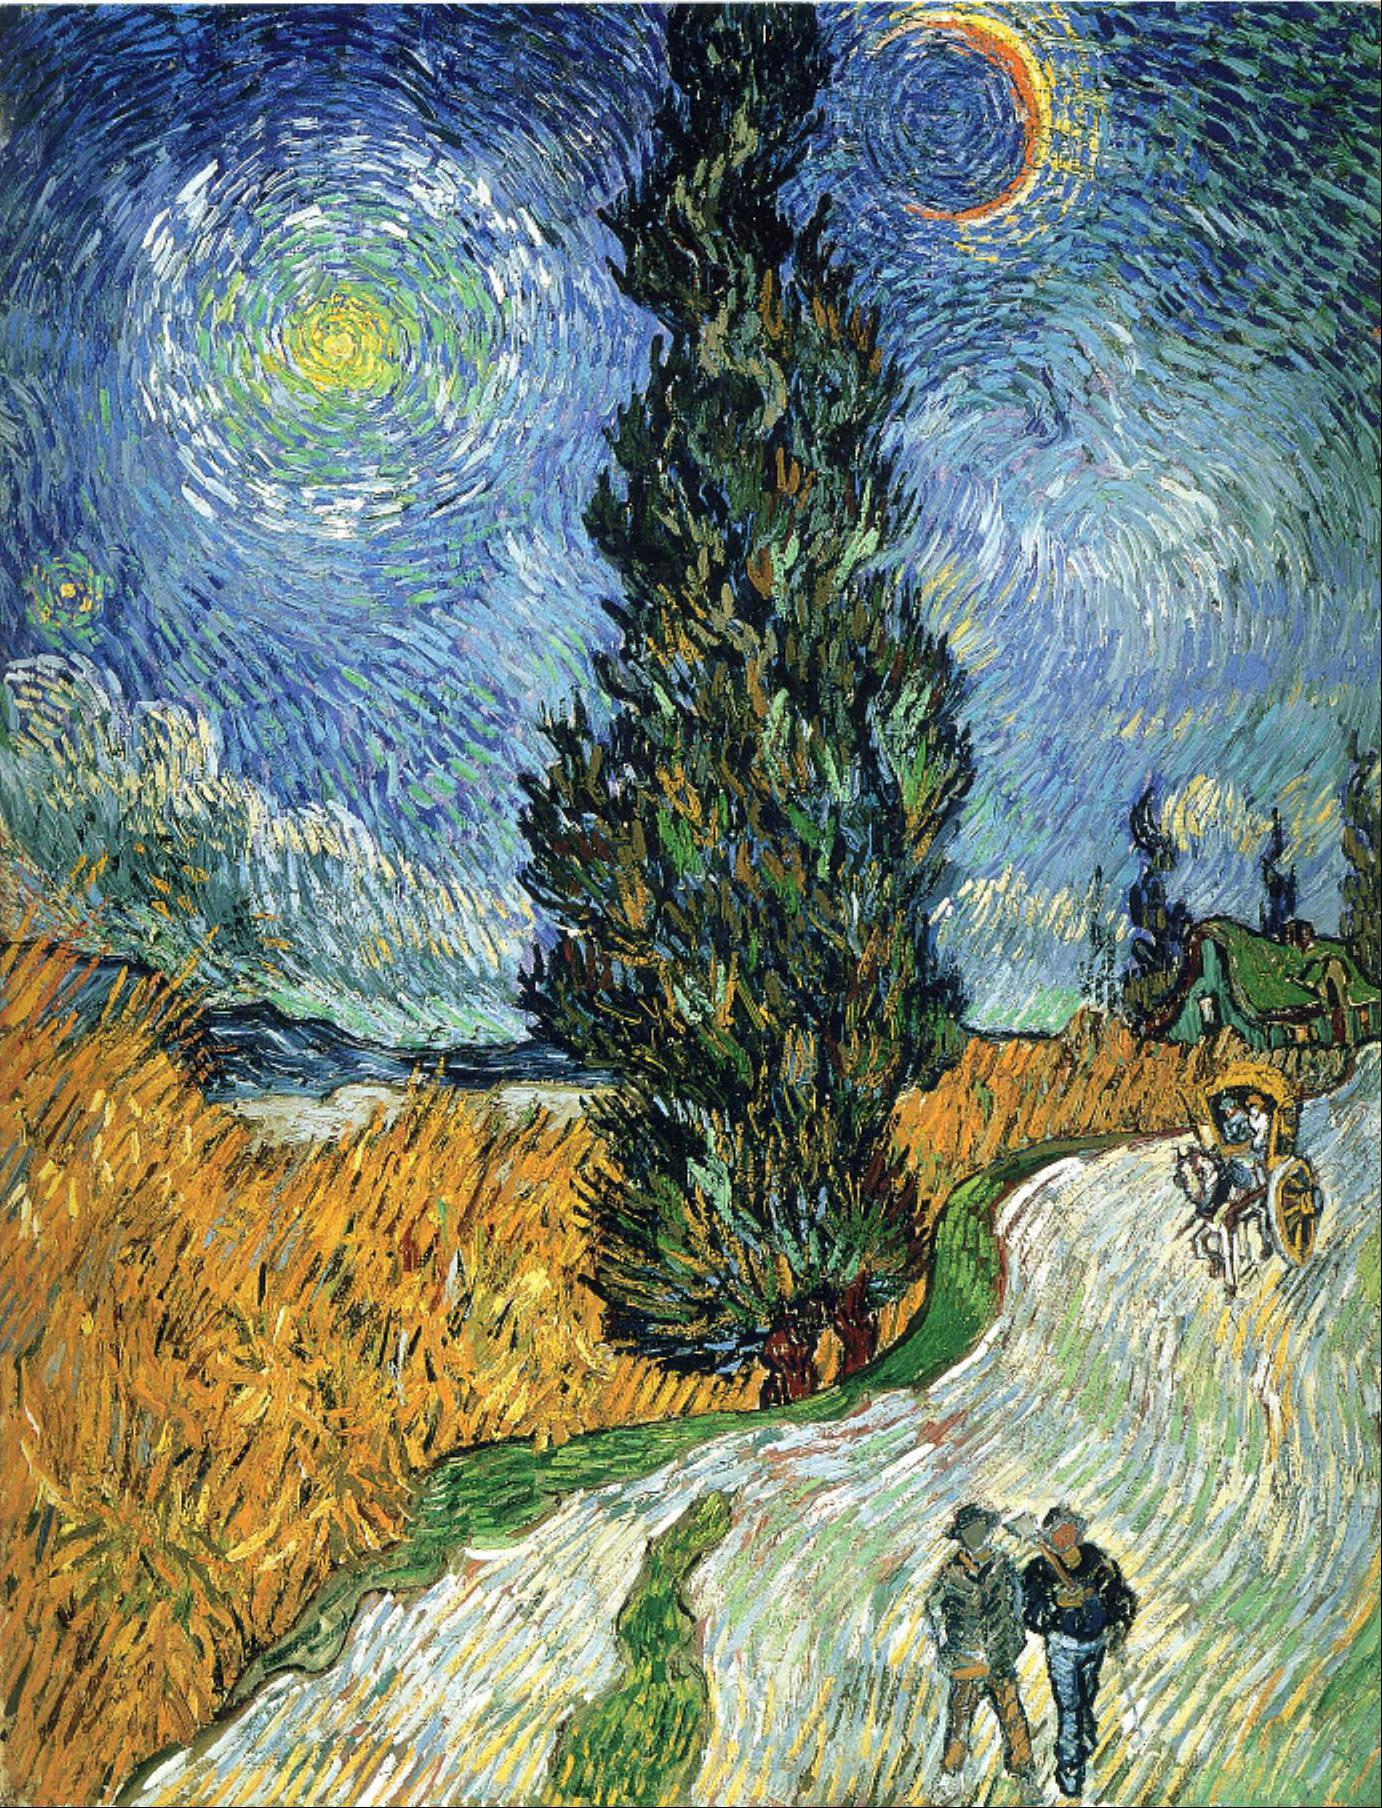

In [16]:
new_arr = enlarge2x(mini_arr)
Image.fromarray(new_arr).save('/content/drive/MyDrive/splines/enlarged_road.jpg')
ip.display.display(ip.display.Image('/content/drive/MyDrive/splines/enlarged_road.jpg'))